In [1]:
# 필요한 라이브러리 임포트&설치
# !pip install dbfread
# !pip install haversine
# !pip install sklearn
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from haversine import haversine
from tqdm.notebook import tqdm
%matplotlib inline
import platform
import pickle
import re
platform.system()
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정
%config InlineBackend.figure_format = 'retina'

In [2]:
str에서 특정문자 strip해주고 타입 바꾸고싶을때(astype써도 되는데 그건 int32, 얘는 64)
df_total['C행정구역(동읍면)별'] = pd.to_numeric(df_total['C행정구역(동읍면)별'].str.strip("'")) 

SyntaxError: invalid syntax (<ipython-input-2-18a849582013>, line 1)

In [2]:
# 인덱스로 특정 행 잡아줄 때 
def prep(name):
    df = pd.read_csv(r'./{}'.format(name), encoding = 'cp949')
    df.reset_index(inplace=True)
    df_need = df.rename(columns=df.iloc[0]).drop(df.index[0])
    return df_need

## 출처:KOSIS
청소년방과후활동수요및현황조사

In [51]:
def csv(route):
    k = pd.read_csv('{}'.format(route),encoding='cp949')
    k = k.rename(columns=k.iloc[0]).drop(k.index[0])
    return k

In [52]:
both =  csv('가정에서_경제력을_가진_사람_20201009190827.csv')
# both = both.rename(columns=both.iloc[0]).drop(both.index[0])
both['사례수 (명)'] = both['사례수 (명)'].astype(float)
both['엄마 아빠 모두 번다 (%)'] = both['엄마 아빠 모두 번다 (%)'].astype(float) 
both

,특성별(1),특성별(2),사례수 (명),엄마 아빠 모두 번다 (%),아빠만 번다 (%),엄마만 번다 (%),기타 (%)
1,전체,소계,8291.0,59.2,34.8,3.0,3.0
2,성별,남자,4185.0,58.8,35.3,2.9,3.1
3,성별,여자,4106.0,59.7,34.3,3.1,2.9
4,교급별,초등1년~초등3년,2746.0,57.0,38.1,2.5,2.5
5,교급별,초등4년~초등6년,2880.0,58.6,35.0,3.2,3.2
6,교급별,중등1년~중등3년,2665.0,62.2,31.3,3.3,3.2
7,지역별,서울,1291.0,56.7,37.3,3.2,2.8
8,지역별,인천/경기,2403.0,57.2,36.6,3.0,3.2
9,지역별,대전/충청/세종/강원,1299.0,60.7,32.3,3.5,3.5
10,지역별,광주/전라/제주,1195.0,64.4,29.7,3.0,2.9


In [53]:
both_need = both.iloc[3:7]
both_need

,특성별(1),특성별(2),사례수 (명),엄마 아빠 모두 번다 (%),아빠만 번다 (%),엄마만 번다 (%),기타 (%)
4,교급별,초등1년~초등3년,2746.0,57.0,38.1,2.5,2.5
5,교급별,초등4년~초등6년,2880.0,58.6,35.0,3.2,3.2
6,교급별,중등1년~중등3년,2665.0,62.2,31.3,3.3,3.2
7,지역별,서울,1291.0,56.7,37.3,3.2,2.8


In [54]:
# 변수지정:
total_student = both_need['사례수 (명)'].iloc[:-1].sum()
element_total_student = both_need['사례수 (명)'].iloc[:-2].sum()
element_low_student = both_need['사례수 (명)'].iloc[0]
element_high_student = both_need['사례수 (명)'].iloc[1]
seoul_student = both_need['사례수 (명)'].iloc[-1]

In [55]:
element_low_both_rate = both_need['엄마 아빠 모두 번다 (%)'].iloc[0]
element_high_both_rate = both_need['엄마 아빠 모두 번다 (%)'].iloc[1]
seoul_both_rate = both_need['엄마 아빠 모두 번다 (%)'].iloc[-1]


In [56]:
#전체 모집단 중 초등학생 응답자의 비율
element_total_rate = ((element_total_student/total_student)*100).round(1)
element_low_rate = ((element_low_student/total_student)*100).round(1)
element_high_rate = ((element_high_student/total_student)*100).round(1)
element_total_rate, element_low_rate, element_high_rate

(67.9, 33.1, 34.7)

In [57]:
#서울에 있는 응답자중 초등학생 응답자의 비율
seoul_element_student = ((seoul_student * element_rate) /100).round(0)
seoul_element_student

878.0

In [58]:
#서울에 있는 맞벌이 가구수(서울 응답자 중 맞벌이한다고 응답한 응답자의 수)
((seoul_student * seoul_both_rate) /100).round(1)

732.0

In [59]:
#전체 초등학생 중 맞벌이라고 응답한 학생 수 
element_low_both = ((element_low_student * element_low_both_rate)/100).round(0)
element_high_both = ((element_high_student * element_high_both_rate)/100).round(0)
element_low_both, element_high_both

(1565.0, 1688.0)

In [60]:
#서울 맞벌이 가구(초중포함)
seoul_both = ((seoul_student * seoul_both_rate)/100).round(0)
seoul_both

732.0

In [61]:
seoul_low_both_student = ((((seoul_student * element_low_rate)/100).round(0)*element_low_both_rate)/100).round(0)
seoul_high_both_student = ((((seoul_student * element_high_rate)/100).round(0)*element_high_both_rate)/100).round(0)
seoul_both_student = seoul_low_both_student + seoul_high_both_student
seoul_both_student

506.0

In [62]:
#서울 맞벌이 가구 중 초등학생 자녀를 가진 수
seoul_dual = ((seoul_both_student * seoul_element_student)/seoul_both).round(0)
seoul_dual

607.0

In [96]:
seoul_both

732.0

In [97]:
seoul_student

1291.0

In [98]:
#서울 맞벌이 가구 중 초등학생 자녀를 가진 비율
(seoul_dual/seoul_student)*100

47.01781564678544

In [80]:
csv('귀가_시__부모님_등_어른의_맞이_횟수_20201009190404.csv')

,특성별(1),특성별(2),사례수 (명),항상 맞이해 주신다 (%),가끔 맞이해 주신다 (%),항상 맞이해 주시지 못한다 (%)
1,전체,소계,8563,66.6,24.3,9.1
2,성별,남자,4318,68.3,23.2,8.4
3,성별,여자,4245,64.8,25.4,9.8
4,교급별,초등1년~초등3년,2847,71.2,19.3,9.4
5,교급별,초등4년~초등6년,2996,63.1,27.7,9.2
6,교급별,중등1년~중등3년,2720,65.4,25.8,8.8
7,지역별,서울,1322,71.1,20.9,8.0
8,지역별,인천/경기,2547,66.2,24.5,9.2
9,지역별,대전/충청/세종/강원,1320,63.3,26.4,10.3
10,지역별,광주/전라/제주,1241,61.3,27.4,11.3


In [81]:
csv('오후_2시대_오후_2시2시_59분__수업을_마치고_가장_많이_있는_장소_20201009190424.csv')

,특성별(1),특성별(2),사례수 (명),학교(수업) (%),학교(초등돌봄 방과후 학교) (%),교과목 관련 학원 (%),태권도 도장 (%),예체능 관련 학원 (%),지역 아동센터 방과후 아카데미 (%),도서관 등 공공시설 (%),동네 독서실 공부방 등 (%),동네 주변 놀이터 공원 등 (%),분식점 매점 식당 등 (%),집 (%),기타 (%)
1,전체,소계,8500,38.7,13.7,11.2,3.5,6.7,1.0,0.9,1.4,2.9,1.2,16.3,2.4
2,성별,남자,4281,38.4,12.9,11.2,5.0,4.6,0.9,0.9,1.6,2.8,1.1,17.6,3.1
3,성별,여자,4219,39.0,14.6,11.2,2.0,9.0,1.1,0.9,1.2,3.1,1.2,15.0,1.7
4,교급별,초등1년~초등3년,2844,6.2,32.6,14.4,8.1,14.9,1.7,1.2,2.1,2.9,0.4,14.5,1.1
5,교급별,초등4년~초등6년,3001,29.8,8.8,16.4,1.7,4.9,1.1,1.5,1.8,5.2,2.3,23.0,3.5
6,교급별,중등1년~중등3년,2655,81.3,0.6,2.6,0.2,0.5,0.2,0.3,0.2,0.5,0.9,10.2,2.5
7,지역별,서울,1305,35.4,11.6,13.0,3.4,7.0,0.6,1.5,0.5,3.1,0.5,21.4,1.9
8,지역별,인천/경기,2538,37.0,10.6,10.2,3.7,7.6,1.1,1.0,1.3,3.4,1.5,20.3,2.4
9,지역별,대전/충청/세종/강원,1316,38.8,14.0,9.3,4.2,7.9,1.4,0.5,1.4,2.8,1.1,16.5,2.1
10,지역별,광주/전라/제주,1229,38.6,22.5,10.7,1.7,4.6,2.0,1.5,1.3,2.4,2.0,10.0,2.7


In [82]:
csv('오후_3시대_오후_3시3시_59분__수업을_마치고_가장_많이_있는_장소_20201009190446.csv')

,특성별(1),특성별(2),사례수 (명),학교(수업) (%),학교(초등돌봄 방과후 학교) (%),교과목 관련 학원 (%),태권도 도장 (%),예체능 관련 학원 (%),지역 아동센터 방과후 아카데미 (%),도서관 등 공공시설 (%),동네 독서실 공부방 등 (%),동네 주변 놀이터 공원 등 (%),분식점 매점 식당 등 (%),집 (%),기타 (%)
1,전체,소계,8515,17.8,9.5,21.9,4.6,9.3,1.4,0.9,1.7,3.6,1.3,24.5,3.5
2,성별,남자,4301,17.2,8.6,21.1,6.8,7.0,1.3,1.2,2.0,3.7,0.9,25.2,5.0
3,성별,여자,4214,18.4,10.4,22.8,2.3,11.7,1.4,0.7,1.4,3.5,1.7,23.7,2.0
4,교급별,초등1년~초등3년,2822,1.4,17.9,21.2,10.7,19.9,2.0,0.9,1.9,3.4,0.8,17.9,2.1
5,교급별,초등4년~초등6년,2999,1.7,10.7,37.3,2.3,6.9,1.7,1.2,2.8,5.3,1.3,25.1,3.7
6,교급별,중등1년~중등3년,2694,49.9,1.2,7.9,0.3,1.4,0.3,0.8,0.5,1.8,1.9,29.1,4.8
7,지역별,서울,1304,15.2,8.0,25.0,4.0,9.4,1.3,1.8,0.5,2.8,1.0,27.3,3.8
8,지역별,인천/경기,2538,13.0,7.2,21.4,4.5,10.1,1.4,0.9,1.9,4.4,1.5,30.2,3.5
9,지역별,대전/충청/세종/강원,1311,21.1,9.8,18.7,5.9,8.8,2.1,0.7,1.4,3.2,1.1,24.0,3.3
10,지역별,광주/전라/제주,1234,19.4,18.4,20.3,3.9,9.6,1.6,0.8,2.4,2.8,1.6,15.7,3.5


In [83]:
csv('오후_4시대_오후_4시4시_59분__수업을_마치고_가장_많이_있는_장소_20201009190502.csv')

,특성별(1),특성별(2),사례수 (명),학교(수업) (%),학교(초등돌봄 방과후 학교) (%),교과목 관련 학원 (%),태권도 도장 (%),예체능 관련 학원 (%),지역 아동센터 방과후 아카데미 (%),도서관 등 공공시설 (%),동네 독서실 공부방 등 (%),동네 주변 놀이터 공원 등 (%),분식점 매점 식당 등 (%),집 (%),기타 (%)
1,전체,소계,8511,3.8,4.3,27.6,4.2,9.6,1.6,1.0,1.7,3.8,1.7,36.6,4.1
2,성별,남자,4290,3.9,3.9,26.5,5.7,7.5,1.5,0.8,1.7,4.3,1.5,36.8,6.0
3,성별,여자,4221,3.7,4.8,28.8,2.6,11.9,1.7,1.2,1.6,3.3,2.0,36.4,2.1
4,교급별,초등1년~초등3년,2809,0.4,5.4,16.7,9.6,19.2,2.7,0.9,1.4,5.3,0.6,35.1,2.7
5,교급별,초등4년~초등6년,2996,0.6,4.6,42.9,2.1,7.4,1.8,1.0,2.5,4.3,1.2,28.3,3.3
6,교급별,중등1년~중등3년,2706,10.3,3.8,23.4,0.6,2.8,0.4,1.1,1.1,1.7,3.1,45.3,6.4
7,지역별,서울,1300,2.2,4.8,33.3,2.8,9.4,1.2,1.4,1.1,3.2,1.3,34.3,4.9
8,지역별,인천/경기,2537,2.0,3.0,26.7,3.6,10.8,1.5,1.0,1.5,4.7,1.7,39.8,3.5
9,지역별,대전/충청/세종/강원,1312,4.7,5.3,23.4,4.7,8.3,2.9,0.7,1.5,3.9,1.4,38.6,4.5
10,지역별,광주/전라/제주,1230,6.5,7.6,27.5,5.2,10.9,2.4,1.3,1.8,2.8,2.0,28.5,3.5


In [84]:
csv('오후_5시대_오후_5시5시_59분__수업을_마치고_가장_많이_있는_장소_20201009190518.csv')

,특성별(1),특성별(2),사례수 (명),학교(수업) (%),학교(초등돌봄 방과후 학교) (%),교과목 관련 학원 (%),태권도 도장 (%),예체능 관련 학원 (%),지역 아동센터 방과후 아카데미 (%),도서관 등 공공시설 (%),동네 독서실 공부방 등 (%),동네 주변 놀이터 공원 등 (%),분식점 매점 식당 등 (%),집 (%),기타 (%)
1,전체,소계,8484,0.4,1.2,30.8,4.4,8.1,1.8,0.6,1.5,3.3,0.8,43.3,3.9
2,성별,남자,4283,0.5,1.0,29.0,6.0,7.8,1.7,0.5,1.4,3.7,0.6,42.8,5.1
3,성별,여자,4201,0.4,1.4,32.7,2.6,8.3,1.9,0.7,1.5,3.0,1.0,43.9,2.6
4,교급별,초등1년~초등3년,2801,0.2,0.6,9.4,8.5,12.1,2.9,0.5,0.9,4.6,0.2,57.5,2.6
5,교급별,초등4년~초등6년,2994,0.3,0.9,36.8,3.7,8.9,1.9,0.7,2.1,3.8,0.8,36.9,3.3
6,교급별,중등1년~중등3년,2689,0.9,2.2,45.9,0.7,3.6,0.6,0.8,1.4,1.5,1.4,35.6,5.5
7,지역별,서울,1297,0.7,1.1,35.9,2.9,10.6,1.4,0.5,0.8,2.3,0.8,38.3,4.5
8,지역별,인천/경기,2525,0.2,0.9,30.3,4.3,8.0,1.7,0.6,1.7,3.6,0.5,44.8,3.2
9,지역별,대전/충청/세종/강원,1312,0.6,2.0,26.3,4.1,7.2,3.2,0.6,1.7,3.7,0.9,46.0,3.7
10,지역별,광주/전라/제주,1231,0.5,1.7,30.1,6.0,8.0,2.0,1.0,1.6,3.2,1.1,41.2,3.5


In [85]:
csv('저녁_6시대_저녁_6시6시_59분__수업을_마치고_가장_많이_있는_장소_20201009190539.csv')

,특성별(1),특성별(2),사례수 (명),학교(수업) (%),학교(초등돌봄 방과후 학교) (%),교과목 관련 학원 (%),태권도 도장 (%),예체능 관련 학원 (%),지역 아동센터 방과후 아카데미 (%),도서관 등 공공시설 (%),동네 독서실 공부방 등 (%),동네 주변 놀이터 공원 등 (%),분식점 매점 식당 등 (%),집 (%),기타 (%)
1,전체,소계,8470,0.3,0.7,26.7,3.6,5.1,1.0,0.4,1.0,1.5,0.5,56.3,3.0
2,성별,남자,4279,0.3,0.8,25.5,4.8,4.8,0.9,0.3,0.8,1.6,0.5,56.0,3.6
3,성별,여자,4191,0.2,0.6,28.1,2.4,5.4,1.1,0.4,1.2,1.3,0.4,56.6,2.2
4,교급별,초등1년~초등3년,2789,0.1,0.3,4.2,5.1,4.7,1.3,0.3,0.3,1.0,0.3,80.2,2.4
5,교급별,초등4년~초등6년,2992,0.2,0.4,22.4,4.8,6.8,1.1,0.6,1.2,2.5,0.6,56.5,2.8
6,교급별,중등1년~중등3년,2689,0.6,1.3,53.4,0.8,3.7,0.6,0.4,1.3,0.9,0.5,32.8,3.6
7,지역별,서울,1293,0.4,0.5,32.3,3.2,6.3,0.9,0.5,0.6,1.2,0.1,50.0,3.8
8,지역별,인천/경기,2522,0.1,0.5,25.5,3.7,6.2,1.0,0.2,1.0,2.0,0.4,56.6,2.9
9,지역별,대전/충청/세종/강원,1308,0.5,0.5,22.0,3.3,4.9,1.8,0.6,0.8,1.4,0.8,60.3,3.1
10,지역별,광주/전라/제주,1229,0.4,0.6,24.7,3.5,4.1,0.9,0.5,1.0,1.5,0.7,59.4,2.8


In [86]:
csv('저녁_7시대_저녁_7시7시_59분__수업을_마치고_가장_많이_있는_장소_20201009190620.csv')

,특성별(1),특성별(2),사례수 (명),학교(수업) (%),학교(초등돌봄 방과후 학교) (%),교과목 관련 학원 (%),태권도 도장 (%),예체능 관련 학원 (%),지역 아동센터 방과후 아카데미 (%),도서관 등 공공시설 (%),동네 독서실 공부방 등 (%),동네 주변 놀이터 공원 등 (%),분식점 매점 식당 등 (%),집 (%),기타 (%)
1,전체,소계,8459,0.3,0.5,20.5,3.1,3.5,0.5,0.3,0.7,0.9,0.6,66.5,2.6
2,성별,남자,4274,0.3,0.5,19.9,4.1,4.0,0.5,0.3,0.7,0.9,0.5,64.8,3.4
3,성별,여자,4185,0.2,0.4,21.2,2.1,2.9,0.5,0.3,0.8,0.9,0.6,68.4,1.7
4,교급별,초등1년~초등3년,2783,0.1,0.1,1.3,2.8,2.0,0.4,0.1,0.3,0.3,0.4,90.1,1.9
5,교급별,초등4년~초등6년,2990,0.2,0.2,11.8,5.0,4.5,0.4,0.4,0.8,1.2,0.6,72.5,2.5
6,교급별,중등1년~중등3년,2686,0.7,1.1,47.6,1.3,3.5,0.6,0.5,1.1,1.1,0.7,38.5,3.4
7,지역별,서울,1291,0.3,0.3,25.0,3.6,3.5,0.5,0.2,1.2,0.8,0.6,61.3,2.6
8,지역별,인천/경기,2521,0.2,0.3,20.8,3.1,4.1,0.4,0.2,0.7,1.2,0.6,65.7,2.7
9,지역별,대전/충청/세종/강원,1305,0.5,0.3,17.5,2.5,2.6,0.8,0.7,0.4,0.8,0.5,71.0,2.5
10,지역별,광주/전라/제주,1225,0.3,0.4,16.5,2.9,2.9,0.3,0.3,0.5,1.1,0.5,71.8,2.6


In [87]:
csv('저녁_8시_이후_수업을_마치고_가장_많이_있는_장소_20201009190633.csv')

,특성별(1),특성별(2),사례수 (명),학교(수업) (%),학교(초등돌봄 방과후 학교) (%),교과목 관련 학원 (%),태권도 도장 (%),예체능 관련 학원 (%),지역 아동센터 방과후 아카데미 (%),도서관 등 공공시설 (%),동네 독서실 공부방 등 (%),동네 주변 놀이터 공원 등 (%),분식점 매점 식당 등 (%),집 (%),기타 (%)
1,전체,소계,8456,0.3,0.4,12.0,2.4,2.5,0.2,0.2,0.6,0.5,0.2,78.3,2.3
2,성별,남자,4273,0.4,0.4,11.7,3.2,2.8,0.2,0.3,0.5,0.6,0.2,77.1,2.7
3,성별,여자,4183,0.2,0.4,12.4,1.6,2.3,0.1,0.2,0.7,0.4,0.2,79.7,1.8
4,교급별,초등1년~초등3년,2784,0.1,0.2,0.5,1.5,0.9,0.0,0.1,0.2,0.1,0.1,94.8,1.6
5,교급별,초등4년~초등6년,2991,0.1,0.1,5.0,2.9,3.1,0.1,0.2,0.4,0.7,0.1,84.6,2.7
6,교급별,중등1년~중등3년,2681,0.6,0.9,30.1,2.7,3.7,0.3,0.4,1.2,0.7,0.4,56.4,2.6
7,지역별,서울,1292,0.2,0.2,16.6,2.6,2.3,0.2,0.2,1.0,0.3,0.4,74.1,1.9
8,지역별,인천/경기,2521,0.1,0.2,11.5,2.3,3.1,0.2,0.2,0.4,0.6,0.2,79.4,1.8
9,지역별,대전/충청/세종/강원,1305,0.4,0.3,11.0,1.8,2.5,0.3,0.3,0.3,0.2,0.2,79.9,2.8
10,지역별,광주/전라/제주,1225,0.6,0.2,8.4,1.9,1.8,0.0,0.2,0.4,0.7,0.2,82.9,2.7


In [88]:
csv('초등학생_자녀가_혼자_있는_시간_20201009184230.csv')

,특성별(1),특성별(2),혼자 있는 시간 여부,혼자 있는 시간 여부,혼자 있는 시간 여부,혼자 있는 시간,혼자 있는 시간,혼자 있는 시간,혼자 있는 시간,혼자 있는 시간
1,특성별(1),특성별(2),사례수 (가구),있다 (%),없다 (%),사례수 (가구),1∼3시간 (%),4∼6시간 (%),7시간 이상 (%),평균 (시간)
2,전체,소계,979,45.1,54.9,441,72.4,25.4,2.1,2.8
3,한부모연령별,30대 이하,432,39.0,61.0,169,68.3,29.5,2.2,2.8
4,한부모연령별,40대,496,50.4,49.6,250,75.7,22.0,2.3,2.8
5,한부모연령별,50대 이상,50,45.1,54.9,23,67.8,32.2,0.0,2.7
6,한부모학력별,중졸 이하,42,45.2,54.8,19,55.5,44.5,0.0,3.1
7,한부모학력별,고졸 이하,485,48.5,51.5,235,68.2,29.2,2.5,2.9
8,한부모학력별,대학 이상,452,41.5,58.5,187,79.4,18.8,1.8,2.7
9,혼인상태별,이혼,794,45.6,54.4,362,72.1,26.0,1.9,2.8
10,혼인상태별,사별,139,45.0,55.0,62,71.3,24.8,3.8,3.1


In [89]:
csv('평일_월금__다니는_학원의_개수_교과목_학원__예체능_학원__20201009190911.csv')

,특성별(1),특성별(2),사례수 (명),교과목 학원 (%),교과목 학원 (%),교과목 학원 (%),교과목 학원 (%),교과목 학원 (%),예체능 학원 (%),예체능 학원 (%),예체능 학원 (%),예체능 학원 (%),예체능 학원 (%)
1,특성별(1),특성별(2),소계,0개,1개,2개,3개,4개 이상,0개,1개,2개,3개,4개 이상
2,전체,소계,8290,30.7,30.2,25.4,8.6,5.1,48.6,33.2,12.4,4.0,1.7
3,성별,남자,4183,32.0,29.5,24.2,8.9,5.3,48.0,34.1,12.5,3.6,1.8
4,성별,여자,4107,29.2,31.0,26.7,8.2,4.9,49.3,32.1,12.4,4.5,1.6
5,교급별,초등1년~초등3년,2676,45.0,31.6,15.2,5.6,2.6,23.8,42.6,23.5,7.6,2.5
6,교급별,초등4년~초등6년,2934,23.0,31.0,26.7,11.7,7.7,48.2,34.7,11.3,3.7,2.1
7,교급별,중등1년~중등3년,2680,24.8,27.6,33.7,8.6,5.3,74.2,22.5,2.4,0.5,0.3
8,지역별,서울,1297,25.0,26.4,25.8,13.4,9.5,43.0,29.3,16.2,7.8,3.6
9,지역별,인천/경기,2476,32.0,30.0,25.1,8.3,4.6,46.7,34.1,13.3,3.7,2.2
10,지역별,대전/충청/세종/강원,1267,36.3,31.2,22.3,6.1,4.2,52.4,35.0,9.5,2.7,0.5


In [90]:
csv('평일_월금__집에서_주로_함께_시간을_보내는_사람_20201009190200.csv')

,특성별(1),특성별(2),사례수 (명),나 혼자 (%),나+형제·자매(친구)만 (%),나+엄마만 (%),나+아빠만 (%),나+할머니(할아버지)만 (%),나+친척 등 어른 보호자 (%),나+우리 가족 전체 (%),기타 (%)
1,전체,소계,8553,11.3,10.4,20.6,2.0,4.2,1.4,39.2,10.9
2,성별,남자,4317,11.6,10.2,20.9,2.3,4.6,1.7,38.1,10.6
3,성별,여자,4236,11.0,10.7,20.3,1.6,3.7,1.2,40.3,11.1
4,교급별,초등1년~초등3년,2848,4.7,10.9,29.4,1.7,6.6,1.9,34.9,9.9
5,교급별,초등4년~초등6년,2990,11.2,12.1,17.9,2.4,4.0,1.4,36.7,14.3
6,교급별,중등1년~중등3년,2715,18.2,8.3,14.4,1.8,1.4,1.1,46.5,8.4
7,지역별,서울,1317,10.2,7.7,23.0,1.5,6.1,2.6,38.0,10.9
8,지역별,인천/경기,2553,10.7,11.4,21.5,1.6,4.2,1.2,38.0,11.4
9,지역별,대전/충청/세종/강원,1318,13.3,10.9,19.5,2.0,3.4,1.3,38.8,10.7
10,지역별,광주/전라/제주,1242,12.2,13.0,17.4,1.6,2.9,0.7,42.4,9.7


In [91]:
csv('평일_월금__활동을_마치고_제일_늦게_귀가하는_시간_20201009190721.csv')

,특성별(1),특성별(2),사례수 (명),오후 2시 이전 (%),오후 2시~2시 29분 (%),오후 2시 30분~2시 59분 (%),오후 3시~3시 29분 (%),오후 3시 30분~3시 59분 (%),오후 4시~4시 29분 (%),오후 4시 30분~4시 59분 (%),...,오후 5시 30분~5시 59분 (%),저녁 6시~6시 29분 (%),저녁 6시 30분~6시 59분 (%),저녁 7시~7시 29분 (%),저녁 7시 30분~7시 59분 (%),저녁 8시~8시 29분 (%),저녁 8시 30분~8시 59분 (%),저녁 9시~9시 29분 (%),저녁 9시 30분~9시 59분 (%),저녁 10시 이후 (%)
1,전체,소계,8462,0.2,0.4,1.7,3.0,1.8,3.5,7.5,...,4.3,7.0,10.5,9.6,3.9,4.8,7.5,9.3,3.6,11.4
2,성별,남자,4273,0.3,0.4,1.9,3.0,1.8,3.6,7.5,...,3.9,6.9,10.5,9.3,3.9,5.1,8.0,9.4,3.7,12.1
3,성별,여자,4189,0.2,0.4,1.5,3.0,1.8,3.5,7.5,...,4.7,7.2,10.6,9.8,3.9,4.6,7.1,9.2,3.4,10.6
4,교급별,초등1년~초등3년,2796,0.5,0.8,2.7,5.6,3.4,5.7,11.3,...,7.4,10.6,14.2,8.8,3.0,2.6,2.9,2.5,0.7,0.8
5,교급별,초등4년~초등6년,2972,0.1,0.2,2.1,3.1,1.8,3.3,5.5,...,4.5,8.0,13.4,12.8,5.7,5.8,9.4,7.7,3.0,5.3
6,교급별,중등1년~중등3년,2694,0.1,0.0,0.1,0.3,0.3,1.8,5.5,...,1.4,2.8,4.4,7.2,3.0,6.1,10.2,17.9,7.0,26.8
7,지역별,서울,1308,0.1,0.2,0.7,2.1,1.8,3.4,6.9,...,3.4,6.0,10.6,8.6,4.7,4.9,6.8,10.1,3.7,17.1
8,지역별,인천/경기,2526,0.4,0.4,2.3,3.9,1.6,3.2,7.6,...,3.8,7.4,11.1,8.8,3.8,5.3,7.6,8.8,3.4,11.5
9,지역별,대전/충청/세종/강원,1299,0.1,0.5,2.5,4.2,2.6,4.4,7.8,...,5.6,7.4,8.7,9.8,3.7,4.1,7.0,8.8,2.9,8.6
10,지역별,광주/전라/제주,1221,0.3,0.4,1.3,1.9,1.8,4.4,6.5,...,5.2,8.3,13.7,9.7,4.0,5.6,9.1,7.3,2.9,6.8


In [92]:
csv('평일_월금__활동을_마치고_제일_일찍_귀가하는_시간_20201009190650.csv')

,특성별(1),특성별(2),사례수 (명),오후 2시 이전 (%),오후 2시~2시 29분 (%),오후 2시 30분~2시 59분 (%),오후 3시~3시 29분 (%),오후 3시 30분~3시 59분 (%),오후 4시~4시 29분 (%),오후 4시 30분~4시 59분 (%),...,오후 5시 30분~5시 59분 (%),저녁 6시~6시 29분 (%),저녁 6시 30분~6시 59분 (%),저녁 7시~7시 29분 (%),저녁 7시30분~7시 59분 (%),저녁 8시~8시 29분 (%),저녁 8시 30분~8시 59분 (%),저녁 9시~9시 29분 (%),저녁 9시 30분~9시 59분 (%),저녁 10시 이후 (%)
1,전체,소계,8526,6.9,6.4,3.5,4.9,11.9,12.3,4.7,...,9.5,10.2,3.1,3.1,5.6,4.9,2.0,1.6,2.1,2.1
2,성별,남자,4306,7.3,6.5,3.4,4.7,12.7,11.0,4.6,...,8.7,10.1,2.8,3.1,5.9,5.9,1.7,1.8,2.4,2.6
3,성별,여자,4220,6.6,6.0,3.6,5.1,11.4,13.3,4.7,...,9.7,9.8,3.4,3.0,5.3,4.4,2.5,1.5,2.1,2.0
4,교급별,초등1년~초등3년,2814,12.2,9.3,4.4,7.0,12.8,15.0,6.2,...,9.8,9.7,2.4,1.3,2.0,0.8,0.1,0.1,0.3,0.1
5,교급별,초등4년~초등6년,2996,7.8,8.1,5.1,4.1,8.5,11.2,4.3,...,12.5,12.2,3.1,3.8,5.9,3.0,1.1,1.2,1.2,0.7
6,교급별,중등1년~중등3년,2716,0.5,1.4,1.0,3.5,14.7,10.6,3.7,...,5.8,8.4,3.9,4.2,9.0,11.3,4.8,3.6,5.0,5.7
7,지역별,서울,1315,8.4,5.3,3.7,5.2,12.1,11.4,3.8,...,7.4,9.8,2.8,3.5,5.2,4.6,2.3,1.6,3.1,5.1
8,지역별,인천/경기,2538,9.0,7.1,4.3,6.0,12.1,11.0,4.2,...,8.5,8.9,2.4,2.7,5.8,5.7,1.8,1.4,2.5,1.5
9,지역별,대전/충청/세종/강원,1315,6.1,9.4,3.8,4.6,13.2,13.4,4.7,...,10.3,8.6,3.7,2.4,5.1,3.7,1.9,1.3,1.3,2.4
10,지역별,광주/전라/제주,1235,4.8,4.5,2.6,3.7,11.3,12.6,4.2,...,11.3,13.0,4.5,4.0,6.2,4.7,2.4,1.5,1.2,1.2


In [93]:
csv('평일_학교_수업을_마치는_시간_제일_일찍_마치는_시간__20201009190742.csv')

,특성별(1),특성별(2),사례수 (명),오후 1시 이전 (%),오후 1시~1시 29분 (%),오후 1시 30분~1시 59분 (%),오후 2시~2시 29분 (%),오후 2시 30분~2시 59분 (%),오후 3시~3시 29분 (%),오후 3시 30분~3시 59분 (%),오후 4시~4시 29분 (%),오후 4시 30분~4시 59분 (%),오후 5시~5시 29분 (%),오후 5시 30분~5시 59분 (%),저녁 6시 이후 (%)
1,전체,소계,8568,16.7,17.3,20.2,8.2,7.0,23.2,4.7,1.3,0.7,0.4,0.1,0.1
2,성별,남자,4326,16.4,17.1,20.1,7.6,6.9,24.7,4.6,1.1,0.7,0.4,0.1,0.1
3,성별,여자,4242,17.1,17.6,20.4,8.8,7.1,21.5,4.8,1.4,0.7,0.4,0.0,0.1
4,교급별,초등1년~초등3년,2840,33.6,28.2,18.0,6.6,4.6,6.0,1.7,0.2,0.7,0.2,0.1,0.1
5,교급별,초등4년~초등6년,3011,13.3,20.9,37.0,12.6,6.3,7.0,1.5,0.2,0.7,0.5,0.1,0.1
6,교급별,중등1년~중등3년,2717,2.9,3.6,5.3,6.3,10.0,55.6,11.1,3.6,0.8,0.5,0.0,0.2
7,지역별,서울,1317,26.2,12.0,23.5,4.8,7.4,22.4,2.2,0.2,0.5,0.5,0.0,0.2
8,지역별,인천/경기,2552,18.7,19.7,20.3,7.6,6.2,22.9,3.6,0.3,0.3,0.2,0.0,0.2
9,지역별,대전/충청/세종/강원,1325,9.4,12.0,25.1,15.5,8.5,21.8,4.3,1.8,1.0,0.7,0.0,0.0
10,지역별,광주/전라/제주,1240,11.5,16.9,19.0,11.6,6.3,20.6,9.9,2.9,0.8,0.1,0.2,0.2


In [94]:
def draw(df, x, y):
    plt.figure(figsize=(40,10))
    plt.bar(df.iloc[x], df.iloc[y])
    plt.show()

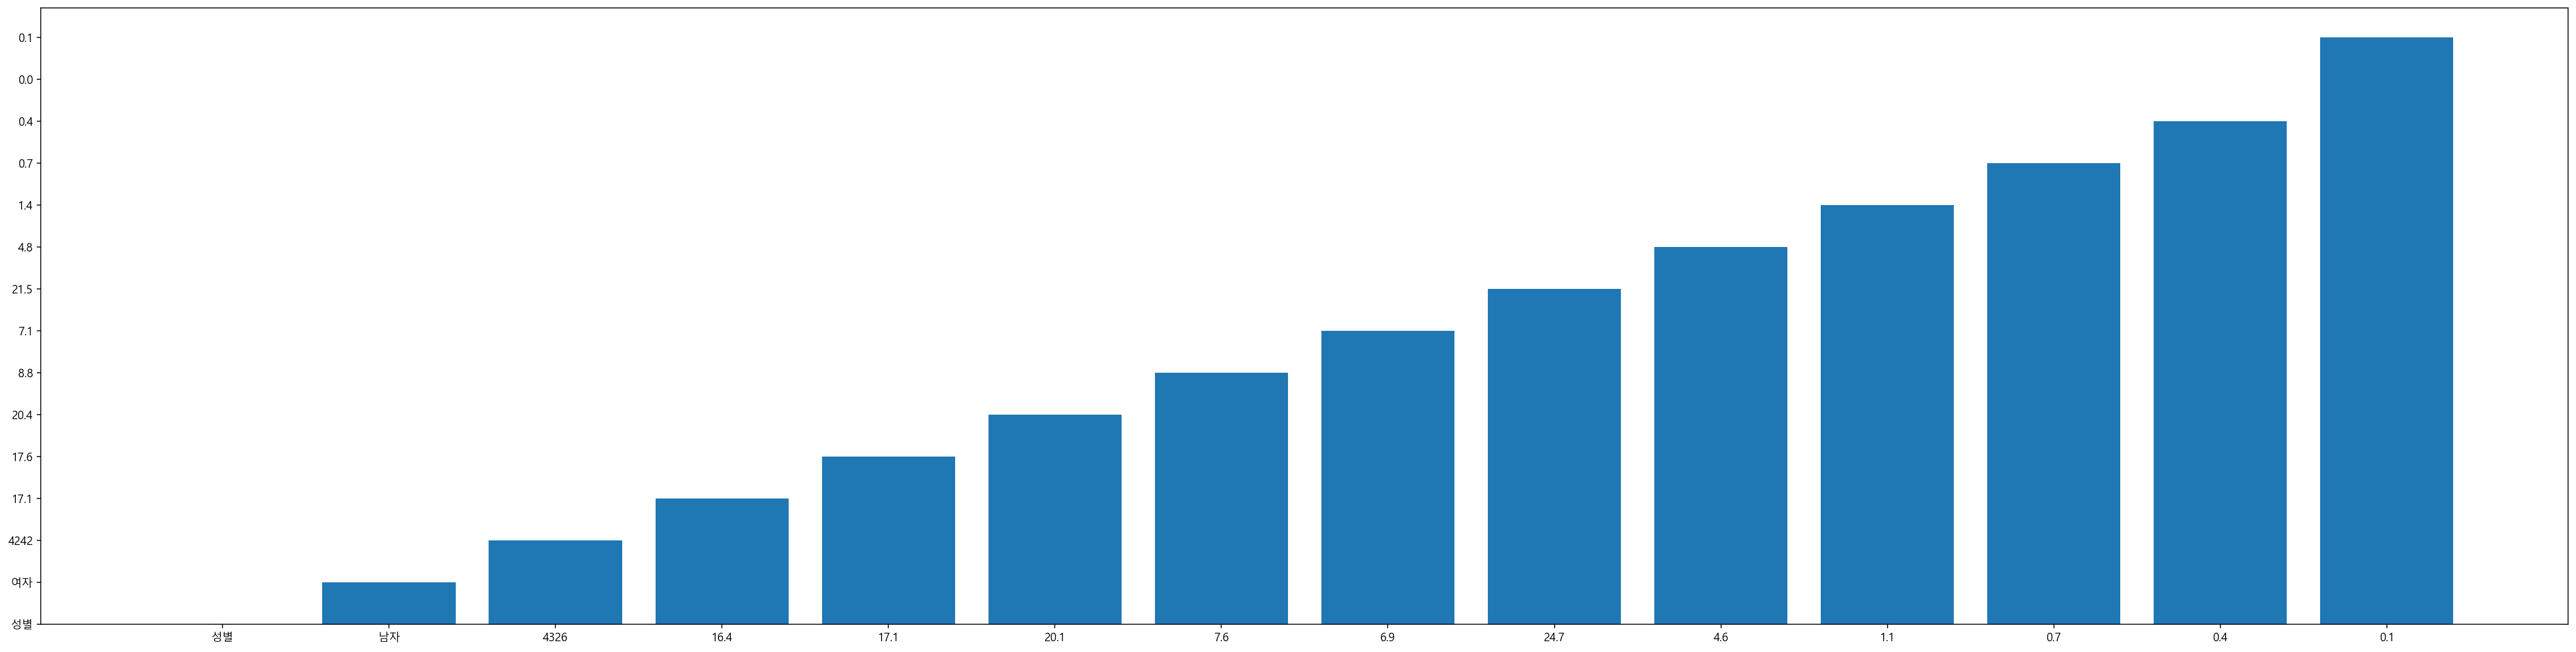

In [95]:
draw(csv('평일_학교_수업을_마치는_시간_제일_일찍_마치는_시간__20201009190742.csv'), 1, 2)